In [1]:
pip install ipywidgets

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [12]:
import random
import networkx as nx
from pyvis.network import Network
from IPython.display import display, IFrame
import ipywidgets as widgets

# Load the graph
edges_file_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"  # Update this path according to your environment
G = nx.read_edgelist(edges_file_path)

# Function to run consensus Polya urn model and visualize the network
def interactive_consensus_polya_urn(G, iterations):
    urn = list(G.nodes())  # Initialize urn with node labels
    results = {node: 0 for node in G.nodes()}  # Initialize results dict with counts

    for _ in range(iterations):
        chosen_node = random.choice(urn)  # Randomly choose a node
        results[chosen_node] += 1  # Update count for chosen node
        
        urn.append(chosen_node)  # Always add chosen node back to urn

    # Visualize the updated network within this function where results is defined
    net = Network(notebook=True, height='750px', width='100%', bgcolor="#222222", font_color="white", cdn_resources='in_line')
    net.from_nx(G)
    for node in G.nodes():
        net.add_node(node, title=f"Selected {results[node]} times", size=results[node] * 10)
    for edge in G.edges():
        net.add_edge(edge[0], edge[1])

    # Show the network visualization
    net.show("interactive_facebook_network.html")
    # Display the network visualization inline in the Jupyter notebook
    display(IFrame('interactive_facebook_network.html', width='100%', height='750px'))

# Widget for selecting the number of iterations
iterations_slider = widgets.IntSlider(value=1000, min=100, max=5000, step=100, description='Iterations:')

# Button to run the simulation
run_button = widgets.Button(description='Run Simulation')

# Output widget to display the interactive network visualization
output = widgets.Output()

def on_run_button_clicked(b):
    with output:
        output.clear_output()
        interactive_consensus_polya_urn(G, iterations_slider.value)

# Link the button click event to the function
run_button.on_click(on_run_button_clicked)

# Display the widgets
display(iterations_slider, run_button, output)



IntSlider(value=1000, description='Iterations:', max=5000, min=100, step=100)

Button(description='Run Simulation', style=ButtonStyle())

Output()

In [3]:
import random
import networkx as nx
from pyvis.network import Network
from IPython.display import display, IFrame
import ipywidgets as widgets

# Load the graph
edges_file_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"  # Update this path according to your environment
G = nx.read_edgelist(edges_file_path)

def interactive_consensus_polya_urn(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    Simulate the consensus Polya urn process with an additional ad effect.

    Parameters:
    - G: The network graph.
    - iterations: Number of iterations to run the simulation.
    - ad_effect_probability: Probability that an ad effect spreads to neighbors.
    - ad_influence_strength: Additional count to add for ad influence.
    """
    urn = list(G.nodes())  # Initialize urn with node labels
    results = {node: 0 for node in G.nodes()}  # Initialize results dict with counts

    for _ in range(iterations):
        chosen_node = random.choice(urn)  # Randomly choose a node
        results[chosen_node] += 1  # Update count for chosen node
        urn.append(chosen_node)  # Always add chosen node back to urn

        # Simulate ad effect spreading to neighbors
        if random.random() < ad_effect_probability:  # With a certain probability
            for neighbor in G.neighbors(chosen_node):  # For each neighbor
                # Increase their count based on ad influence strength
                results[neighbor] += ad_influence_strength
                urn.append(neighbor)  # Simulate increased influence by adding them back to the urn

    # Visualize the updated network within this function where results is defined
    net = Network(notebook=True, height='750px', width='100%', bgcolor="#222222", font_color="white", cdn_resources='in_line')
    net.from_nx(G)
    for node in G.nodes():
        net.add_node(node, title=f"Selected {results[node]} times", size=results[node] * 10)
    for edge in G.edges():
        net.add_edge(edge[0], edge[1])

    # Show the network visualization
    net.show("interactive_facebook_network1.html")
    # Display the network visualization inline in the Jupyter notebook
    display(IFrame('interactive_facebook_network1.html', width='100%', height='750px'))

# Widget for selecting the number of iterations
iterations_slider = widgets.IntSlider(value=1000, min=100, max=5000, step=100, description='Iterations:')

# Button to run the simulation
run_button = widgets.Button(description='Run Simulation')

# Output widget to display the interactive network visualization
output = widgets.Output()

def on_run_button_clicked(b):
    with output:
        output.clear_output()
        interactive_consensus_polya_urn(G, iterations_slider.value)

# Link the button click event to the function
run_button.on_click(on_run_button_clicked)

# Display the widgets
display(iterations_slider, run_button, output)


IntSlider(value=1000, description='Iterations:', max=5000, min=100, step=100)

Button(description='Run Simulation', style=ButtonStyle())

Output()

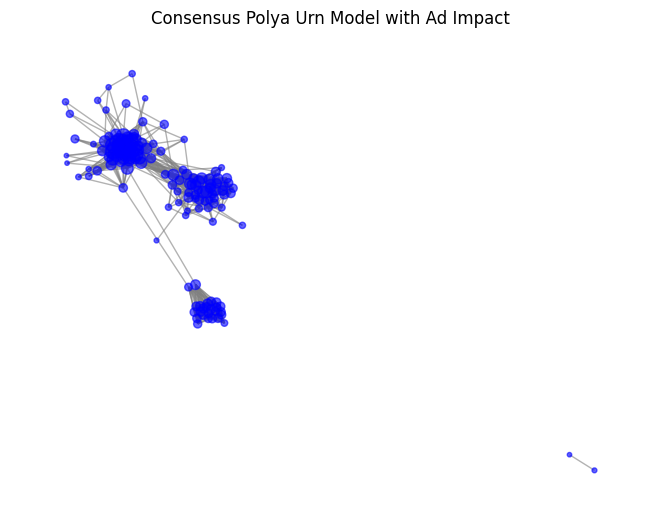

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Update this path to the location where you have the file in your environment
# For demonstration, the path is set as given, but you need to adjust it according to where the file is located in your system.
edges_file_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"  # Example: "/path/to/414.edges"

# Load the graph
G = nx.read_edgelist(edges_file_path)

def consensus_polya_urn_model(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    Simulate the consensus Polya urn process with ad effect on a network graph.
    
    Parameters:
    - G: NetworkX graph object.
    - iterations: Number of iterations to run the simulation.
    - ad_effect_probability: Probability of an ad effect influencing neighbors.
    - ad_influence_strength: The strength of ad influence on neighbors.
    """
    results = {node: 1 for node in G.nodes()}  # Start with 1 to ensure all nodes are represented
    
    for _ in range(iterations):
        chosen_node = random.choice(list(G.nodes))
        results[chosen_node] += 1
        
        if random.random() < ad_effect_probability:
            for neighbor in G.neighbors(chosen_node):
                results[neighbor] += ad_influence_strength
    
    # Normalize sizes for visualization
    max_influence = max(results.values())
    sizes = [100 * results[node] / max_influence for node in G.nodes()]
    
    return sizes

# Run the model
iterations = 1000  # Example number of iterations
node_sizes = consensus_polya_urn_model(G, iterations)

# Plot the graph
pos = nx.spring_layout(G)  # For consistent layout
nx.draw(G, pos, node_size=node_sizes, with_labels=False, node_color='blue', alpha=0.6, edge_color='gray')
plt.title("Consensus Polya Urn Model with Ad Impact")
plt.show()


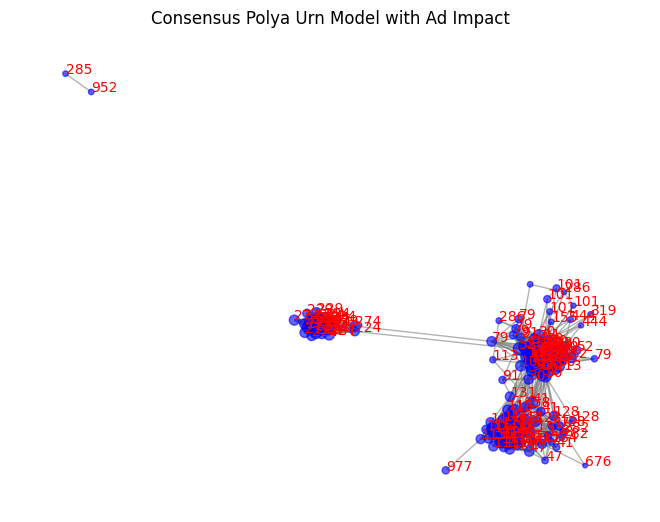

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming edges_file_path is correctly set to the path of your .edges file
edges_file_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"  # Update this path

# Load the graph
G = nx.read_edgelist(edges_file_path)

def consensus_polya_urn_model(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    Simulate the consensus Polya urn process with ad effect on a network graph, recording timestamps.
    
    Parameters:
    - G: NetworkX graph object.
    - iterations: Number of iterations to run the simulation.
    - ad_effect_probability: Probability of an ad effect influencing neighbors.
    - ad_influence_strength: The strength of ad influence on neighbors.
    """
    results = {node: {'count': 1, 'timestamps': []} for node in G.nodes()}  # Initialize with count and timestamps
    
    for iteration in range(iterations):
        chosen_node = random.choice(list(G.nodes))
        results[chosen_node]['count'] += 1
        
        if random.random() < ad_effect_probability:
            for neighbor in G.neighbors(chosen_node):
                results[neighbor]['count'] += ad_influence_strength
                results[neighbor]['timestamps'].append(iteration)  # Record the iteration number
    
    # Normalize sizes for visualization and prepare timestamps data
    max_influence = max(result['count'] for result in results.values())
    sizes = [100 * results[node]['count'] / max_influence for node in G.nodes()]
    timestamps = {node: results[node]['timestamps'] for node in G.nodes()}
    
    return sizes, timestamps

iterations = 1000  # Number of iterations
node_sizes, node_timestamps = consensus_polya_urn_model(G, iterations)

# Visualization (Optional: Modify as needed to visualize the process or the final state with timestamps)
pos = nx.spring_layout(G)  # For consistent layout
nx.draw(G, pos, node_size=node_sizes, with_labels=False, node_color='blue', alpha=0.6, edge_color='gray')
plt.title("Consensus Polya Urn Model with Ad Impact")

# Optionally, annotate some nodes with the first timestamp they were influenced by the ad (for demonstration)
for node, timestamps in node_timestamps.items():
    if timestamps:  # Check if the node was influenced
        plt.text(pos[node][0], pos[node][1], str(timestamps[0]), color='red')

plt.show()


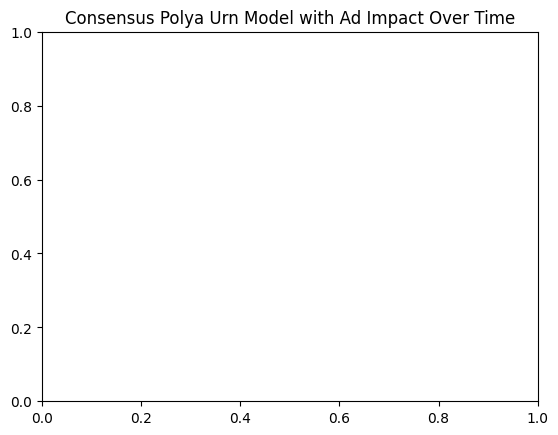

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation

# Assuming edges_file_path is correctly set to the path of your .edges file
edges_file_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"  # Update this path

# Load the graph
G = nx.read_edgelist(edges_file_path)

def consensus_polya_urn_model_animated(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    This modified function aims to generate data for each iteration to facilitate animation.
    """
    results = {node: {'count': 1, 'timestamps': []} for node in G.nodes()}
    data_per_iteration = []
    
    for iteration in range(iterations):
        chosen_node = random.choice(list(G.nodes()))
        results[chosen_node]['count'] += 1
        
        if random.random() < ad_effect_probability:
            for neighbor in G.neighbors(chosen_node):
                results[neighbor]['count'] += ad_influence_strength
                results[neighbor]['timestamps'].append(iteration)
        
        # Capture state for the current iteration
        max_influence = max(result['count'] for result in results.values())
        sizes = [100 * results[node]['count'] / max_influence for node in G.nodes()]
        data_per_iteration.append(sizes)
    
    return data_per_iteration

iterations = 10  # Adjust for a smoother or longer animation
data_per_iteration = consensus_polya_urn_model_animated(G, iterations)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)  # For consistent layout

def update(num, data, G):
    ax.clear()
    sizes = data[num]
    nx.draw(G, pos, ax=ax, node_size=sizes, with_labels=False, node_color='blue', alpha=0.6, edge_color='gray')

ani = FuncAnimation(fig, update, frames=iterations, fargs=(data_per_iteration, G))

plt.title("Consensus Polya Urn Model with Ad Impact Over Time")
plt.show()


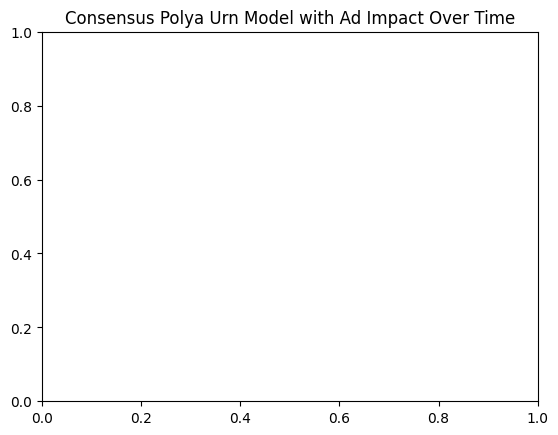

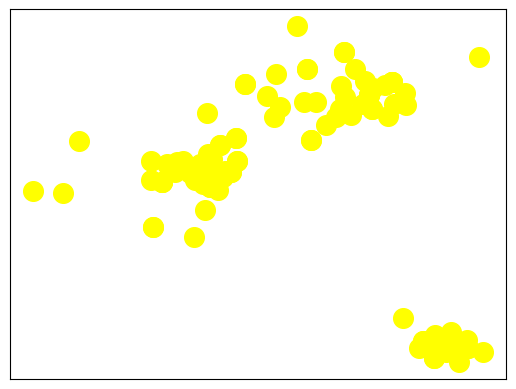

In [8]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import networkx as nx
import random

# Load your graph here, make sure to replace the path with the actual path to your .edges file
G = nx.read_edgelist("/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges")

def consensus_polya_urn_model_animated(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    This function captures the state of the network at each iteration for animation,
    including which node is currently influencing others.
    """
    results = {node: {'count': 1, 'influenced': False, 'timestamps': []} for node in G.nodes()}
    data_per_iteration = []
    chosen_nodes_per_iteration = []  # Track the chosen node for each iteration
    
    for iteration in range(iterations):
        chosen_node = random.choice(list(G.nodes()))
        chosen_nodes_per_iteration.append(chosen_node)  # Record the chosen node
        
        results[chosen_node]['count'] += 1
        if random.random() < ad_effect_probability:
            results[chosen_node]['influenced'] = True
            for neighbor in G.neighbors(chosen_node):
                results[neighbor]['count'] += ad_influence_strength
                results[neighbor]['influenced'] = True
                results[neighbor]['timestamps'].append(iteration)
        
        sizes = [100 * results[node]['count'] / max(result['count'] for result in results.values()) for node in G.nodes()]
        colors = ['red' if results[node]['influenced'] else 'blue' for node in G.nodes()]
        data_per_iteration.append((sizes, colors))
    
    return data_per_iteration, chosen_nodes_per_iteration

iterations = 100  # Adjust the number of iterations as needed
data_per_iteration, chosen_nodes_per_iteration = consensus_polya_urn_model_animated(G, iterations)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)  # Node positions for consistent layout

def update(num, data, G, chosen_nodes):
    ax.clear()
    sizes, colors = data[num]
    chosen_node = chosen_nodes[num]  # Get the chosen node for the current iteration
    nx.draw(G, pos, ax=ax, node_size=sizes, with_labels=False, node_color=colors, alpha=0.6, edge_color='gray')
    # Highlight the chosen node
    nx.draw_networkx_nodes(G, pos, nodelist=[chosen_node], node_size=200, node_color='yellow')

# Assign the animation to a variable to prevent it from being garbage collected
ani = FuncAnimation(fig, update, frames=iterations, fargs=(data_per_iteration, G, chosen_nodes_per_iteration))

plt.title("Consensus Polya Urn Model with Ad Impact Over Time")
plt.show()

# Save the animation to a file
ani.save('/Users/madeline/Desktop/network_animation1.mp4', writer='ffmpeg', fps=10)


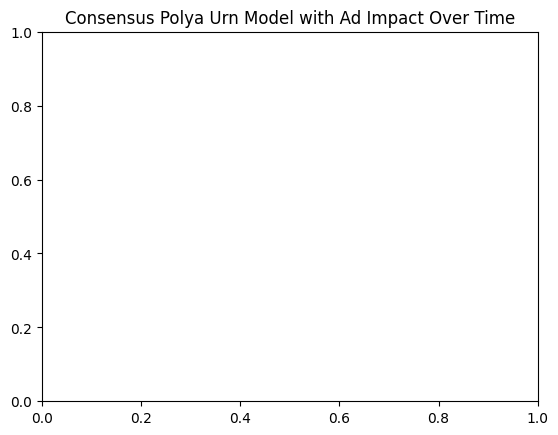

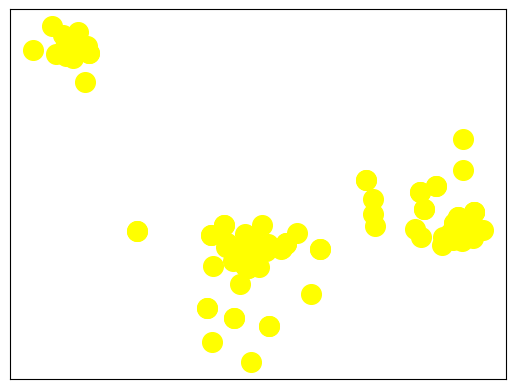

In [13]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import networkx as nx
import random

# Load your graph here, make sure to replace the path with the actual path to your .edges file
G = nx.read_edgelist("/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges")

def consensus_polya_urn_model_animated(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    This function captures the state of the network at each iteration for animation,
    including which node is currently influencing others. Only a third of the neighbors are influenced.
    """
    results = {node: {'count': 1, 'influenced': False, 'timestamps': []} for node in G.nodes()}
    data_per_iteration = []
    chosen_nodes_per_iteration = []  # Track the chosen node for each iteration
    
    for iteration in range(iterations):
        chosen_node = random.choice(list(G.nodes()))
        chosen_nodes_per_iteration.append(chosen_node)  # Record the chosen node
        
        results[chosen_node]['count'] += 1
        if random.random() < ad_effect_probability:
            results[chosen_node]['influenced'] = True
            neighbors = list(G.neighbors(chosen_node))
            random.shuffle(neighbors)  # Randomize the order of neighbors
            influenced_neighbors = neighbors[:max(1, len(neighbors) // 3)]  # Influence only a third of the neighbors, at least one
            
            for neighbor in influenced_neighbors:
                results[neighbor]['count'] += ad_influence_strength
                results[neighbor]['influenced'] = True
                results[neighbor]['timestamps'].append(iteration)
        
        sizes = [10 * results[node]['count'] / max(result['count'] for result in results.values()) for node in G.nodes()]
        colors = ['red' if results[node]['influenced'] else 'blue' for node in G.nodes()]
        data_per_iteration.append((sizes, colors))
    
    return data_per_iteration, chosen_nodes_per_iteration

iterations = 100  # Adjust the number of iterations as needed
data_per_iteration, chosen_nodes_per_iteration = consensus_polya_urn_model_animated(G, iterations)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)  # Node positions for consistent layout

def update(num, data, G, chosen_nodes):
    ax.clear()
    sizes, colors = data[num]
    chosen_node = chosen_nodes[num]  # Get the chosen node for the current iteration
    nx.draw(G, pos, ax=ax, node_size=sizes, with_labels=False, node_color=colors, alpha=0.6, edge_color='gray')
    # Highlight the chosen node
    nx.draw_networkx_nodes(G, pos, nodelist=[chosen_node], node_size=200, node_color='yellow')

# Assign the animation to a variable to prevent it from being garbage collected
ani = FuncAnimation(fig, update, frames=iterations, fargs=(data_per_iteration, G, chosen_nodes_per_iteration))

plt.title("Consensus Polya Urn Model with Ad Impact Over Time")
plt.show()

# Save the animation to a file
ani.save('/Users/madeline/Desktop/network_animation2.mp4', writer='ffmpeg', fps=10)
